In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from skimage.transform import resize
import time
from imageio import imwrite

In [9]:
if(not os.path.exists('./test_digits')):
    os.system('mkdir test_digits')

In [10]:
test_image = mpimg.imread('digits_filled.jpg')
test_image.shape
#test_image = (np.sum(test_image, axis = 2)/3.)/255.
test_image.shape

#test_image = 255. - test_image

(1400, 2800, 3)

In [13]:
for j in range(5):
    for i in range(10):
        x_mid = 280*j + 140
        y_mid = 280*i + 140
        digit = test_image[x_mid-126:x_mid+126, y_mid-126:y_mid+126, :]

        template = np.zeros((280, 280, 3)) + 255
        template[14:266, 14:266, :] = digit
        template = (1 - (np.sum(template, axis = 2)/3.)/255)

        template = (resize(template, (template.shape[0]/10, template.shape[1]/10), anti_aliasing=False))
        
        # Need a unique filename for each of the digits, but want to be able to identify the 
        # digit from the file name
        file_name = str(i) + "_" + str(int(time.time()))+str(i)+str(j) + '.png'

        imwrite('./test_digits/'+file_name, template)

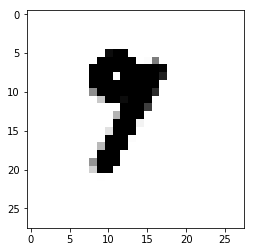

In [12]:

plt.imshow(template, cmap = 'binary')